In [1]:
import nltk

In [2]:
from nltk.corpus import stopwords

In [3]:
m=[l.rstrip() for l in open('smsspamcollection\SmsSpamCollection')]

In [4]:
m[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [3]:
import pandas as pd
import numpy as np

In [4]:
w=pd.read_csv('smsspamcollection\SmsSpamCollection',sep='\t',names=['Type','Meassage'])

In [7]:
w.head()

Type                                           Meassage
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [20]:
w.groupby('Type').describe()

Meassage                                                               
        count unique                                                top freq
Type                                                                        
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
w['Length']=w['Meassage'].apply(len)

In [6]:
w.head()

Type                                           Meassage  Length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

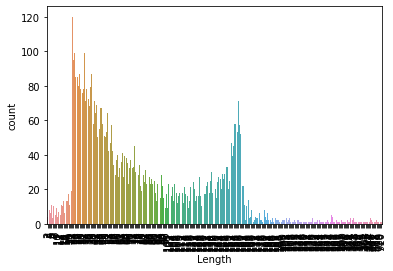

In [28]:
plt.xticks(rotation=90)
sns.countplot(w['Length'])

In [29]:
w['Length'].max()

910

In [150]:
w[w['Length']==910].iloc

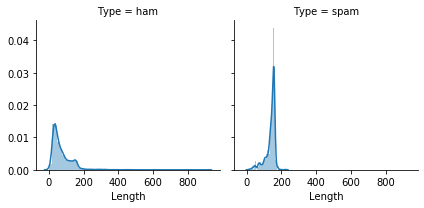

In [24]:
plt.Figure(figsize=(12,4))
q=sns.FacetGrid(w,col='Type')
q.map(sns.distplot,'Length',bins=60)

In [33]:
w[w['Type']=='spam']['Length'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: Length, dtype: float64

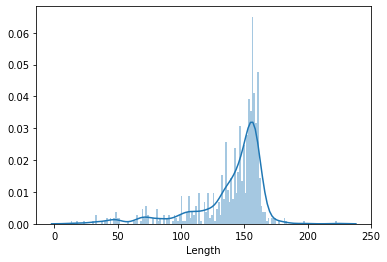

In [37]:
sns.distplot(w[w['Type']=='spam']['Length'],bins=150)

In [38]:
w[w['Type']=='spam']['Length'].value_counts()

158    43
155    37
156    37
159    33
160    32
       ..
83      1
82      1
68      1
66      1
13      1
Name: Length, Length: 115, dtype: int64

In [152]:
s="Oh ! Your are swapnil?"

In [153]:
import string

In [154]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [158]:
now=[e for e in s if e not in string.punctuation]

In [159]:
now="".join(now)

In [160]:
now

'Oh  Your are swapnil'

In [84]:
get=[d for d in now.split() if d.lower() not in stopwords.words('english')]

In [85]:
get="".join(get)

In [86]:
get

'Ohswapnil'

In [10]:
def xxx(m):
    ww=[r for r in m if r not in string.punctuation] #removes punctuation
    ww="".join(ww) 
    ww=[r for r in ww.split() if r.lower() not in stopwords.words("english")] #removes stopwords
    return ww

In [19]:
w.head()

Type                                           Meassage  Length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [25]:
w['Meassage'].apply(xxx)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: Meassage, Length: 5572, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
bow=CountVectorizer(analyzer=xxx).fit(w['Meassage'])

In [15]:
print(len(bow.vocabulary_))

11425


In [35]:
w['Meassage'][3]

'U dun say so early hor... U c already then say...'

In [40]:
print(bow.transform([w['Meassage'][3]]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [16]:
b4=bow.transform([w['Meassage'][3]])

In [17]:
b4.shape

(1, 11425)

In [42]:
bow.get_feature_names()[9554]

'say'

In [19]:
result=bow.transform(w['Meassage'])

In [20]:
result.shape

(5572, 11425)

In [21]:
result.nnz

50548

In [23]:
sparcity=(100* result.nnz/(result.shape[0]*result.shape[1]))
print((sparcity))

0.07940295412668218


In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
tt=TfidfTransformer()

In [27]:
tt_now=tt.fit(result)

In [29]:
tt_now_trans=tt_now.transform(result)

In [36]:
tt_now_trans

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
spam_detect_model=MultinomialNB().fit(tt_now_trans,w['Meassage'])

In [40]:
now_result=spam_detect_model.predict(tt_now_trans)

In [41]:
from sklearn.pipeline import Pipeline

In [48]:
pp=Pipeline([
('b',CountVectorizer(analyzer=xxx)),
    ('idf',TfidfTransformer()),
    ('pr',MultinomialNB())
])

In [44]:
from sklearn.model_selection import train_test_split

In [55]:
train_msg, test_msg, train_label, test_label = train_test_split(w['Meassage'],w['Type'],test_size=0.3)

In [163]:
model=pp.fit(train_msg,train_label)

In [57]:
predictions=pp.predict(test_msg)

In [162]:
pp.predict(['Free entry in 2 a wkly comp to win FA Cup fina'])[0]

'spam'

In [161]:
w[w['Type']=='spam']['Meassage']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Meassage, Length: 747, dtype: object

In [67]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(predictions,test_label))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1521
        spam       0.68      1.00      0.81       151

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.89      1672
weighted avg       0.97      0.96      0.96      1672



In [169]:
print("Model accuracy is {} %".format(model.score(test_msg,test_label)*100))

Model accuracy is 95.69377990430623 %
